In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['SimSun']  # 选择适合的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 避免坐标轴的负号显示问题

In [7]:
# 提供实际数据
t_data = np.array([0, 2.5, 5, 7.5, 10])  # 时间数据
#转换一下时间单位
t_data = t_data/10**(6)
# 转换一下析晶占比
X_data = np.array([1,  2, 3, 4, 4.5])  # 相变进度数据
X_data = (X_data-1)/(4.5-1)
# 使用 curve_fit 进行参数拟合

In [9]:
X_data

array([0.        , 0.28571429, 0.57142857, 0.85714286, 1.        ])

In [10]:
# 定义 JMA 方程
def jma_equation(t, k, n):
    return 1 - np.exp(-k * t**n)

拟合得到的 k 值: 837.7983689684942
拟合得到的 n 值: -70.32164368990064


C:\Users\zhang\AppData\Local\Temp\ipykernel_33460\12731023.py:3: RuntimeWarning: divide by zero encountered in power
  return 1 - np.exp(-k * t**n)
C:\Users\zhang\AppData\Local\Temp\ipykernel_33460\12731023.py:3: RuntimeWarning: overflow encountered in power
  return 1 - np.exp(-k * t**n)


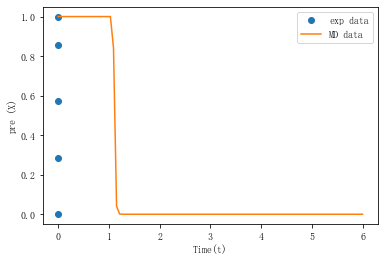

In [14]:
params, covariance = curve_fit(jma_equation, t_data, X_data, p0=[1.0, 1.0])

# 输出拟合得到的参数
k_fit, n_fit = params
print(f"拟合得到的 k 值: {k_fit}")
print(f"拟合得到的 n 值: {n_fit}")

# 绘制拟合曲线
t_fit = np.linspace(0, 6, 100)  # 创建用于绘制拟合曲线的时间点
X_fit = jma_equation(t_fit, k_fit, n_fit)  # 计算拟合曲线
plt.plot(t_data, X_data, 'o', label='exp data')
plt.plot(t_fit, X_fit, label='MD data')
plt.xlabel('Time(t)')
plt.ylabel('pre (X)')
plt.legend()
plt.show()


拟合得到的 k 值: 0.2079135588561624
拟合得到的 n 值: 1.6978750737066797


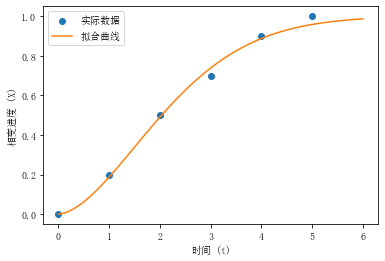

In [16]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 定义 JMA 方程
def jma_equation(t, k, n):
    return 1 - np.exp(-k * t**n)

# 提供实际数据
t_data = np.array([0, 1, 2, 3, 4, 5])  # 时间数据
X_data = np.array([0, 0.2, 0.5, 0.7, 0.9, 1.0])  # 相变进度数据

# 使用 curve_fit 进行参数拟合
params, covariance = curve_fit(jma_equation, t_data, X_data, p0=[1.0, 1.0])

# 输出拟合得到的参数
k_fit, n_fit = params
print(f"拟合得到的 k 值: {k_fit}")
print(f"拟合得到的 n 值: {n_fit}")

# 绘制拟合曲线
t_fit = np.linspace(0, 6, 100)  # 创建用于绘制拟合曲线的时间点
X_fit = jma_equation(t_fit, k_fit, n_fit)  # 计算拟合曲线
plt.plot(t_data, X_data, 'o', label='实际数据')
plt.plot(t_fit, X_fit, label='拟合曲线')
plt.xlabel('时间 (t)')
plt.ylabel('相变进度 (X)')
plt.legend()
plt.show()


拟合得到的析晶活化能 (Ea): 85939.01722097285 J/mol


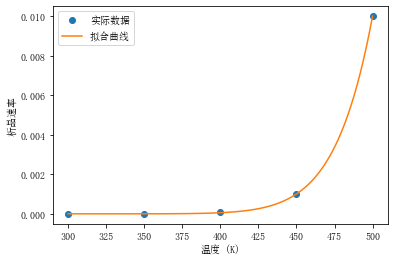

In [17]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 定义 Arrhenius 方程用于拟合
def arrhenius_equation(T, Ea, A):
    R = 8.314  # 理想气体常数，单位 J/(mol·K)
    return A * np.exp(-Ea / (R * T))

# 提供温度和析晶速率数据
# 请将你的实际数据替换为下面的示例数据
T_data = np.array([300, 350, 400, 450, 500])  # 温度数据，单位开尔文
rate_data = np.array([1e-6, 1e-5, 1e-4, 1e-3, 1e-2])  # 析晶速率数据，单位/s

# 使用 curve_fit 进行参数拟合
params, covariance = curve_fit(arrhenius_equation, T_data, rate_data, p0=[1.0, 1.0])

# 输出拟合得到的参数
Ea_fit, A_fit = params
print(f"拟合得到的析晶活化能 (Ea): {Ea_fit} J/mol")

# 绘制拟合曲线
T_fit = np.linspace(300, 500, 100)  # 创建用于绘制拟合曲线的温度点
rate_fit = arrhenius_equation(T_fit, Ea_fit, A_fit)  # 计算拟合曲线
plt.plot(T_data, rate_data, 'o', label='实际数据')
plt.plot(T_fit, rate_fit, label='拟合曲线')
plt.xlabel('温度 (K)')
plt.ylabel('析晶速率')
plt.legend()
plt.show()
